# DataFrames and Relational Operations

A DataFrame is a RDD organized into named columns. It is conceptually equivalent to a table in a relational database or a data frame in R/Python, but with richer optimizations under the hood. DataFrames can be constructed from a wide array of sources such as: structured data files, tables in Hive, external databases, or existing RDDs. The form to create dataFrames in spark is through a SQL context wich is an object of the Spark SQL module.

<br>
<div align="center">
     <img src="static/sparkDataframe.png" width="70%">
</div>

### Creating dataFrames with SQLContext

The SqlContext is a class and is used for initializing the functionalities of Spark SQL. SparkContext class object (sc) is required for initializing SQLContext class object. When case classes cannot be defined ahead of time (for example, the structure of records is encoded in a string, or a text dataset will be parsed and fields will be projected differently for different users), a DataFrame can be created in the following ways:

1) Apply the schema to the RDD of Rows via **createDataFrame** method provided by **SparkContext**.

**Example:** Creating a the SQL context

In [1]:
import math
import pyspark
from pyspark.sql import SQLContext

sc = pyspark.SparkContext('local[*]')
sqlContext = SQLContext(sc)

**Example:** Creating a dataframe using the example of the histogram

In [2]:
def intervalClass(value):
    interval = math.floor((value-minimum)/intervalLength)
    if (interval >= bins):
        return bins-1
    else:
        return interval 

In [3]:
floatsRDD = sc.textFile('data/amounts.txt').map(lambda x: float(x))
bins = 30
theCountOfTheRDD=floatsRDD.count()
maximum = floatsRDD.max()
minimum = floatsRDD.min()
intervalLength = (maximum-minimum)/bins
frequencyTableRDD = floatsRDD.map(lambda x:(intervalClass(x),1))\
                             .reduceByKey(lambda x,y: x+y)\
                             .map(lambda y:(y[0]+1,\
                                  minimum+intervalLength*y[0],\
                                  minimum+intervalLength*(y[0]+1),\
                                  y[1]/theCountOfTheRDD))

In [4]:
frequencyTableSchema=['Bin','LowerLimit','UpperLimit','Frequency']
frequencyDF = sqlContext.createDataFrame(frequencyTableRDD,frequencyTableSchema)
frequencyDF.show()

+---+------------------+------------------+---------+
|Bin|        LowerLimit|        UpperLimit|Frequency|
+---+------------------+------------------+---------+
|  1|              0.06|152.11999999999998|   0.2662|
|  3|304.17999999999995|456.23999999999995|   0.1424|
|  5| 608.2999999999998| 760.3599999999998|   0.0764|
| 15|2128.8999999999996|2280.9599999999996|   0.0046|
|  9|1216.5399999999997|1368.5999999999997|   0.0232|
| 13|1824.7799999999997|1976.8399999999997|   0.0058|
|  7| 912.4199999999998|1064.4799999999998|    0.041|
| 21|3041.2599999999993|3193.3199999999993|   8.0E-4|
| 11|1520.6599999999996|1672.7199999999996|   0.0156|
| 17|2433.0199999999995|2585.0799999999995|   0.0022|
| 23| 3345.379999999999| 3497.439999999999|   2.0E-4|
| 29|           4257.74| 4409.799999999999|   4.0E-4|
| 19|2737.1399999999994|2889.1999999999994|   0.0014|
|  4|456.23999999999995| 608.2999999999998|    0.108|
|  2|152.11999999999998|304.17999999999995|   0.1954|
|  6| 760.3599999999998| 912

2) Create an RDD of tuples or lists from the original RDD.

**Example**: Creating a DataFrame using the function **toDF( )**

In [5]:
meansTableSchema = ['Bin_','AverageByBin']
meansTableDF = floatsRDD.map(lambda x:(intervalClass(x),(x,1)))\
                        .reduceByKey(lambda x, y: (x[0]+y[0],x[1]+y[1]))\
                        .map(lambda z: (z[0],z[1][0]/z[1][1]))\
                        .toDF(meansTableSchema)
meansTableDF.show()

+----+------------------+
|Bin_|      AverageByBin|
+----+------------------+
|   0| 72.45056348610062|
|   2|372.61179775280897|
|   4| 681.9975130890053|
|  14|2207.4121739130433|
|   8|1291.9476724137935|
|  12| 1893.831724137931|
|   6| 984.4356585365854|
|  20|         3111.7075|
|  10|1595.1253846153845|
|  16|2490.8645454545454|
|  22|           3484.16|
|  28|           4317.21|
|  18|2781.6885714285713|
|   3| 529.4409444444444|
|   1| 224.4947697031729|
|   5| 833.8509302325581|
|   7|1133.4300714285712|
|   9|1440.3262650602408|
|  11|1747.8194642857145|
|  13|2036.4704347826087|
+----+------------------+
only showing top 20 rows



Printing the schemas.

In [6]:
frequencyDF.printSchema()
meansTableDF.printSchema()

root
 |-- Bin: long (nullable = true)
 |-- LowerLimit: double (nullable = true)
 |-- UpperLimit: double (nullable = true)
 |-- Frequency: double (nullable = true)

root
 |-- Bin_: long (nullable = true)
 |-- AverageByBin: double (nullable = true)



## Data manipulation with SQL operators
---
Due to SQL is the most popular query language for data manipulation, spark DataFrames provides a set of relational operations in addition to the mapreduce operations inherit of the spark rdd.


### Select and where clauses

**Example:** Loadings data using the spark SQL context

In [7]:
import pandas as pd
moviesCatalogDF = sqlContext.createDataFrame(pd.read_csv('data/MoviesCatalog.csv'))
userCatalogDF = sqlContext.createDataFrame(pd.read_csv('data/UserCatalog.csv'))
moviesRatingsDF = sqlContext.createDataFrame(pd.read_csv('data/MoviesRatings.csv'))
userCatalogDF.show()
moviesCatalogDF.show()
moviesRatingsDF.show()

+-------+---------+---------+
|User_id|Firstname| Lastname|
+-------+---------+---------+
|      1|  Timothy|   Snyder|
|      2|    Scott|    Jones|
|      3|    Debra|      Kim|
|      4|    Steve|   Austin|
|      5|   Andrew|   Chavez|
|      6|   Philip|  Nichols|
|      7| Nicholas|    Price|
|      8|   Angela| Lawrence|
|      9|    Alice|   Martin|
|     10|    Kathy|    Davis|
|     11|  Jeffrey|     Wood|
|     12|   Martha|   Howard|
|     13|  Anthony|    Henry|
|     14|     Rose|  Stewart|
|     15|   Nicole|   Bishop|
|     16|    Linda|   Weaver|
|     17| Michelle|   Bowman|
|     18|   Johnny|Henderson|
|     19|     Sean|    Smith|
|     20|   Sandra|  Garrett|
+-------+---------+---------+
only showing top 20 rows

+--------+-------------------+
|Movie_id|              Title|
+--------+-------------------+
|       1|          Toy Story|
|       2|          GoldenEye|
|       3|         Four Rooms|
|       4|         Get Shorty|
|       5|            Copycat|
|     

### Join clause

The **join** consists of combining each row of a table with each row of the other table, selecting those rows that meet a certain condition.

**Example:** Joining the two dataframes.

In [8]:
moviesUserInfoDF = userCatalogDF.join(moviesRatingsDF,on='User_id')\
                                .join(moviesCatalogDF,on='Movie_id')\
    
moviesUserInfoDF.show()

+--------+-------+---------+---------+------+-----------------+
|Movie_id|User_id|Firstname| Lastname|Rating|            Title|
+--------+-------+---------+---------+------+-----------------+
|      26|    222|   Harold|   Jacobs|     3|Brothers McMullen|
|      26|    293| Michelle|  Garrett|     3|Brothers McMullen|
|      26|    237|    Bruce|  Stewart|     3|Brothers McMullen|
|      26|      7| Nicholas|    Price|     3|Brothers McMullen|
|      26|    126|    Roger|   Nelson|     4|Brothers McMullen|
|      26|    274|   Willie|Armstrong|     3|Brothers McMullen|
|      26|     50|    Chris|    Owens|     4|Brothers McMullen|
|      26|    343|   Joseph|   Gordon|     3|Brothers McMullen|
|      26|    116| Lawrence|    Mason|     2|Brothers McMullen|
|      26|     25|   Dennis|    Reyes|     3|Brothers McMullen|
|      26|    181|   Steven|  Spencer|     4|Brothers McMullen|
|      26|    369|    Linda|    Woods|     2|Brothers McMullen|
|      26|    413|     Juan|      Lee|  

**Example**: Joining the catalogs

In [9]:
from pyspark.sql.functions import col

frequencyDF.join(meansTableDF,col('Bin')==col('Bin_')).show()

+---+------------------+------------------+---------+----+------------------+
|Bin|        LowerLimit|        UpperLimit|Frequency|Bin_|      AverageByBin|
+---+------------------+------------------+---------+----+------------------+
| 29|           4257.74| 4409.799999999999|   4.0E-4|  29|           4561.86|
| 19|2737.1399999999994|2889.1999999999994|   0.0014|  19|          2913.605|
|  7| 912.4199999999998|1064.4799999999998|    0.041|   7|1133.4300714285712|
|  6| 760.3599999999998| 912.4199999999998|   0.0516|   6| 984.4356585365854|
|  9|1216.5399999999997|1368.5999999999997|   0.0232|   9|1440.3262650602408|
| 17|2433.0199999999995|2585.0799999999995|   0.0022|  17|         2641.0675|
|  5| 608.2999999999998| 760.3599999999998|   0.0764|   5| 833.8509302325581|
|  1|              0.06|152.11999999999998|   0.2662|   1| 224.4947697031729|
| 10|1368.5999999999997|1520.6599999999996|   0.0166|  10|1595.1253846153845|
|  3|304.17999999999995|456.23999999999995|   0.1424|   3| 529.4

### Select and where clauses

**Querry**: Obtain the movies rated by Kevin Scott

In [10]:
moviesUserInfoDF.select(['Firstname','Lastname','Rating','Title'])\
                .where((col('Firstname')=='Kevin') & (col('Lastname')=='Scott'))\
                .show()

+---------+--------+------+--------------------+
|Firstname|Lastname|Rating|               Title|
+---------+--------+------+--------------------+
|    Kevin|   Scott|     5|   Brothers McMullen|
|    Kevin|   Scott|     4|      Batman Forever|
|    Kevin|   Scott|     4|             Amadeus|
|    Kevin|   Scott|     3|Star Trek: First ...|
|    Kevin|   Scott|     4|            Outbreak|
|    Kevin|   Scott|     4|         Restoration|
|    Kevin|   Scott|     4|             Flipper|
|    Kevin|   Scott|     3|Last of the Mohicans|
|    Kevin|   Scott|     4|To Kill a Mocking...|
|    Kevin|   Scott|     4|      Spitfire Grill|
|    Kevin|   Scott|     4|          Home Alone|
|    Kevin|   Scott|     5|Star Trek III: Th...|
|    Kevin|   Scott|     5|             Henry V|
|    Kevin|   Scott|     3|            Die Hard|
|    Kevin|   Scott|     4|          Disclosure|
|    Kevin|   Scott|     4| Alice in Wonderland|
|    Kevin|   Scott|     5|Miracle on 34th S...|
|    Kevin|   Scott|

**Querry**: Obtain the movies with rate greather than 3 

In [11]:
moviesUserInfoDF.select(['Firstname','Lastname','Rating','Title'])\
                .where(col('Rating')>=3)\
                .show()

+---------+---------+------+-----------------+
|Firstname| Lastname|Rating|            Title|
+---------+---------+------+-----------------+
|   Harold|   Jacobs|     3|Brothers McMullen|
| Michelle|  Garrett|     3|Brothers McMullen|
|    Bruce|  Stewart|     3|Brothers McMullen|
| Nicholas|    Price|     3|Brothers McMullen|
|    Roger|   Nelson|     4|Brothers McMullen|
|   Willie|Armstrong|     3|Brothers McMullen|
|    Chris|    Owens|     4|Brothers McMullen|
|   Joseph|   Gordon|     3|Brothers McMullen|
|   Dennis|    Reyes|     3|Brothers McMullen|
|   Steven|  Spencer|     4|Brothers McMullen|
|    Randy|   Hunter|     3|Brothers McMullen|
|   Teresa|   Oliver|     3|Brothers McMullen|
|   Daniel|     Ryan|     3|Brothers McMullen|
|    Sarah|  Spencer|     3|Brothers McMullen|
|    Alice|   Martin|     4|Brothers McMullen|
|  Anthony|    Reyes|     3|Brothers McMullen|
|    Randy|  Sanchez|     3|Brothers McMullen|
|    Jason| Johnston|     4|Brothers McMullen|
|    Terry|  

### GroupBy clause and agregation functions over groups


**Querry**: Number of movies watched for each user

In [12]:
moviesUserInfoDF.select(['Firstname','Lastname'])\
                .groupBy(['Firstname','Lastname']).count()\
                .show()

+---------+--------+-----+
|Firstname|Lastname|count|
+---------+--------+-----+
|    Linda|   Woods|   17|
|   Ernest|  Watson|   73|
|   Pamela|     Lee|   46|
|   Bonnie|  Fuller|   15|
|    Helen| Carroll|   38|
|    Kathy|  Hunter|    4|
|     Mary|   Henry|   12|
|    Henry|    Long|   37|
|   Martha|  Howard|   69|
|    Kevin|   Scott|   70|
|   Carlos| Hawkins|   26|
|    Terry|  Harvey|   35|
|     Todd|Anderson|   18|
|Katherine|   Burke|   12|
|    Nancy|   Olson|    6|
|  Anthony|   Henry|   64|
|     Lois| Coleman|   24|
|    Jerry|    Reed|   26|
|    Jerry| Mendoza|   45|
|   Janice|    Reid|    3|
+---------+--------+-----+
only showing top 20 rows



**Querry**: Obtain the top 10 rated movies.

In [13]:
moviesUserInfoDF.select(['Title','Rating'])\
                .groupBy('Title').avg()\
                .orderBy('avg(Rating)',ascending= False)\
                .limit(10).show()

+----------------+-----------------+
|           Title|      avg(Rating)|
+----------------+-----------------+
|    Mary Poppins|              5.0|
|     Black Sheep|              5.0|
|            Blob|              5.0|
|  Sound of Music|             4.75|
|         Twister|4.714285714285714|
|             187|4.695652173913044|
|  Amityville 3-D|4.666666666666667|
|Dead Man Walking|           4.5625|
|       Big Night|             4.55|
|  Princess Bride|4.545454545454546|
+----------------+-----------------+



### Introductions to SQL Functions
___
**UDF: ** User defined functions are a simple way of adding a function into the SparkSQL language. This function operates on distributed DataFrames and works row by row (unless you're creating an user defined aggregation function).

**Example**: Transforming from string to data type 

In [14]:
import pandas as pd

milkProductionStrDF = sqlContext.createDataFrame(pd.read_csv('data/MilkProduction.csv'))
milkProductionStrDF.printSchema()
milkProductionStrDF.limit(5).show()

root
 |-- Month: string (nullable = true)
 |-- Milk: long (nullable = true)

+----------+----+
|     Month|Milk|
+----------+----+
|01/01/1962| 589|
|01/02/1962| 561|
|01/03/1962| 640|
|01/04/1962| 656|
|01/05/1962| 727|
+----------+----+



In [15]:
from datetime import datetime
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType,IntegerType

toDate =  udf(lambda stringDate: datetime.strptime(stringDate,'%d/%m/%Y'),DateType())
getYear = udf(lambda date: date.year,IntegerType())

milkProductionDF = milkProductionStrDF.withColumn('Date',toDate(col('Month')))\
                                      .withColumn('Year',getYear(col('Date')))

milkProductionDF.show()
milkProductionDF.printSchema()

+----------+----+----------+----+
|     Month|Milk|      Date|Year|
+----------+----+----------+----+
|01/01/1962| 589|1962-01-01|1962|
|01/02/1962| 561|1962-02-01|1962|
|01/03/1962| 640|1962-03-01|1962|
|01/04/1962| 656|1962-04-01|1962|
|01/05/1962| 727|1962-05-01|1962|
|01/06/1962| 697|1962-06-01|1962|
|01/07/1962| 640|1962-07-01|1962|
|01/08/1962| 599|1962-08-01|1962|
|01/09/1962| 568|1962-09-01|1962|
|01/10/1962| 577|1962-10-01|1962|
|01/11/1962| 553|1962-11-01|1962|
|01/12/1962| 582|1962-12-01|1962|
|01/01/1963| 600|1963-01-01|1963|
|01/02/1963| 566|1963-02-01|1963|
|01/03/1963| 653|1963-03-01|1963|
|01/04/1963| 673|1963-04-01|1963|
|01/05/1963| 742|1963-05-01|1963|
|01/06/1963| 716|1963-06-01|1963|
|01/07/1963| 660|1963-07-01|1963|
|01/08/1963| 617|1963-08-01|1963|
+----------+----+----------+----+
only showing top 20 rows

root
 |-- Month: string (nullable = true)
 |-- Milk: long (nullable = true)
 |-- Date: date (nullable = true)
 |-- Year: integer (nullable = true)



So far we have only seen types of SQL functions that act on groups and return a single value for each group, ie aggregation functions, however, they are quite useful in practice, there is still a wide range of operations that cannot be expressed using these types of functions alone. Specifically, there was no way to both operate on a group of rows while still returning a single value for every input row. This limitation makes it hard to conduct various data processing tasks like calculating a moving average, calculating a cumulative sum, or accessing the values of a row appearing before the current row. 

Fortunately for users of Spark SQL, window functions fill this gap. At its core, a window function calculates a return value for every input row of a table based on a group of rows, called the Frame. Every input row can have a unique frame associated with it. This characteristic of window functions makes them more powerful than other functions and allows users to express various data processing tasks that are hard (if not impossible) to be expressed without window functions in a concise way.

**Windows functions:** Windowed Aggregates (window functions) are functions that perform a calculation on a group of records (called a window) that are in some relation to the current record. Window functions calculate values for every record in a window. For specifying a sliding window, there are three components: 


* **Partition by:** Defines how the data is grouped; in the above example, it was by customer. You have to specify a reasonable grouping because all data within a group will be collected to the same machine. Ideally, the DataFrame has already been partitioned by the desired grouping.

* **Order by**: Defines how rows are ordered within a group; in the above example, it was by date.

* **Frame** Defines the boundaries of the window with respect to the current row; in the above example, the window ranged between the previous row and the next row.


**Example**: The moving average for each card at the time of each transaction

In [16]:
from pyspark.sql.window import Window
from pyspark.sql.functions import *
slidingWindow = Window.orderBy('Date').rowsBetween(-12,0)
meanAverageDF = milkProductionDF.withColumn('MovingAvg',avg('Milk').over(slidingWindow))
meanAverageDF.show()

+----------+----+----------+----+-----------------+
|     Month|Milk|      Date|Year|        MovingAvg|
+----------+----+----------+----+-----------------+
|01/01/1962| 589|1962-01-01|1962|            589.0|
|01/02/1962| 561|1962-02-01|1962|            575.0|
|01/03/1962| 640|1962-03-01|1962|596.6666666666666|
|01/04/1962| 656|1962-04-01|1962|            611.5|
|01/05/1962| 727|1962-05-01|1962|            634.6|
|01/06/1962| 697|1962-06-01|1962|            645.0|
|01/07/1962| 640|1962-07-01|1962|644.2857142857143|
|01/08/1962| 599|1962-08-01|1962|          638.625|
|01/09/1962| 568|1962-09-01|1962|630.7777777777778|
|01/10/1962| 577|1962-10-01|1962|            625.4|
|01/11/1962| 553|1962-11-01|1962|618.8181818181819|
|01/12/1962| 582|1962-12-01|1962|           615.75|
|01/01/1963| 600|1963-01-01|1963|614.5384615384615|
|01/02/1963| 566|1963-02-01|1963|612.7692307692307|
|01/03/1963| 653|1963-03-01|1963|619.8461538461538|
|01/04/1963| 673|1963-04-01|1963|622.3846153846154|
|01/05/1963|

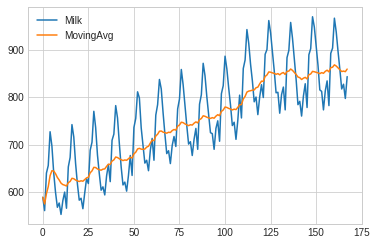

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,8))
fig = meanAverageDF.select(['Date','Milk','MovingAvg']).toPandas().plot()
plt.show()

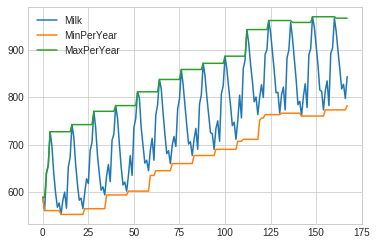

In [18]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,8))
slidingWindow2 = Window.partitionBy('Year').orderBy('Date').rowsBetween(Window.unboundedPreceding,0)
milkProductionDF.withColumn('MaxPerYear',max('Milk').over(slidingWindow))\
                .withColumn('MinPerYear',min('Milk').over(slidingWindow))\
                .select(['Date','Milk','MinPerYear','MaxPerYear'])\
                .toPandas().plot()
plt.show()